In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

In [2]:
# Read text file from Camden County drivers involved in vehicles in year of 2017
df1=pd.read_table('Camden_accidents/Camden2017Vehicles.txt', delimiter=',', names=('Number', 'Vehicle Number', 'Insurance Company','Owner State','Maker of Vehicle', 'Model', 'Color', 'Year of Vehicle','License Plate State', 'Vehicle Weight Rating', 'Towed',
                                                                                   'Removed by', 'At Scene', 'Initial Impact Location', 'Principal Damage Location', 'Extent of Damage', 'Traffic Controls', 'Vehicle Type', 'Vehicle Use', 'Special Function Vehicles',
                                                                                   'Cargo Body Type', 'Circumstance 1', 'Circumstance 2', 'Direction of Travel', 'Pre-Crash Action', 'First Sequence', 'Second', 'Third', 'Fourth', 'MHE', 'OOP','HM', 'HC', 'HP', 'USDOT N',
                                                                                   'MCMX', 'Other flag', 'Other number', 'Carrier Name', 'HRDF'))

In [3]:
df1.head()

,Number,Vehicle Number,Insurance Company,Owner State,Maker of Vehicle,Model,Color,Year of Vehicle,License Plate State,Vehicle Weight Rating,...,OOP,HM,HC,HP,USDOT N,MCMX,Other flag,Other number,Carrier Name,HRDF
0,2017040217-036-A,1,,NJ,NISSAN,ALTIMA,WT,2007,NJ,,...,,,,,,,,,...,Y
1,2017040217-036-A,2,,,,,,,,,...,,,,,,,,,...,
2,2017040217-067-A,1,,PA,JEEP,GRAND CHER,BK,2011,PA,,...,,,,,,,,,...,
3,2017040217-067-A,2,,NJ,MAZDA,323,WT,2005,NJ,,...,,,,,,,,,...,
4,2017040217-161-A,1,962,NJ,HONDA,CIVIC,BK,2016,NJ,,...,,,,,,,,,...,


In [4]:
df1.shape

(29804, 40)

In [5]:
df1.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df1.isnull().sum()

Number                           0
Vehicle Number                   0
Insurance Company             5183
Owner State                   1671
Maker of Vehicle              1303
Model                         1715
Color                         1493
Year of Vehicle               1461
License Plate State           1357
Vehicle Weight Rating        28358
Towed                        29803
Removed by                    1920
At Scene                       959
Initial Impact Location        405
Principal Damage Location      822
Extent of Damage              1316
Traffic Controls              2331
Vehicle Type                   351
Vehicle Use                    375
Special Function Vehicles    27847
Cargo Body Type              27419
Circumstance 1                1208
Circumstance 2               22846
Direction of Travel           1533
Pre-Crash Action               152
First Sequence                  81
Second                       25168
Third                        28261
Fourth              

In [6]:
# Drop columns with limted values
df1=df1.drop(columns=['Vehicle Weight Rating' ,'Towed','Special Function Vehicles', 'Cargo Body Type', 'Circumstance 2', 'Second',
                     'Third','Fourth','OOP','HM', 'HC', 'HP', 'USDOT N', 'MCMX', 'Other flag', 'Other number', 'Carrier Name' ])

In [7]:
df1.shape

(29804, 23)

In [8]:
df1.head().T

,0,1,2,3,4
Number,2017040217-036-A,2017040217-036-A,2017040217-067-A,2017040217-067-A,2017040217-161-A
Vehicle Number,1,2,1,2,1
Insurance Company,NaN,NaN,NaN,NaN,962
Owner State,NJ,NaN,PA,NJ,NJ
Maker of Vehicle,NISSAN,NaN,JEEP,MAZDA,HONDA
Model,ALTIMA,NaN,GRAND CHER,323,CIVIC
Color,WT,NaN,BK,WT,BK
Year of Vehicle,2007,NaN,2011,2005,2016
License Plate State,NJ,NaN,PA,NJ,NJ
Removed by,2,NaN,3,3,1


In [9]:
df1.Color.value_counts()

BK                5807
WT                5479
GY                3488
BL                3023
TN                2754
RD                2440
SL                1972
GN                1281
GD                 537
BN                 363
BG                 357
MN                 323
YL                 287
OG                  98
PL                  39
TQ                  29
CL                  14
CM                  13
PK                   3
 CIVIC DEL SOL       2
XLT)                 1
XE                   1
Name: Color, dtype: int64

In [10]:
df1['License Plate State'].value_counts()

NJ      24426
PA       2495
NY        207
DE        198
MD        144
        ...  
WY          1
NM          1
2016        1
WT          1
1998        1
Name: License Plate State, Length: 64, dtype: int64

In [11]:
df1=df1.drop(columns=['Insurance Company' ,'Owner State','Color', 'License Plate State', 'Removed by', 'Direction of Travel','First Sequence', 'MHE' ])

In [12]:
df1.shape

(29804, 15)

In [13]:
df1.head(10)

,Number,Vehicle Number,Maker of Vehicle,Model,Year of Vehicle,At Scene,Initial Impact Location,Principal Damage Location,Extent of Damage,Traffic Controls,Vehicle Type,Vehicle Use,Circumstance 1,Pre-Crash Action,HRDF
0,2017040217-036-A,1,NISSAN,ALTIMA,2007,1,06,06,02,11,01,01,10,13,Y
1,2017040217-036-A,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017040217-067-A,1,JEEP,GRAND CHER,2011,5,03,04,04,03,04,01,08,04,NaN
3,2017040217-067-A,2,MAZDA,323,2005,3,12,12,04,03,01,01,25,01,NaN
4,2017040217-161-A,1,HONDA,CIVIC,2016,1,12,12,02,04,01,01,02,01,NaN
5,2017040217-161-A,2,HARLEY DAVIDSON,ELECTRIC,2007,3,06,03,04,04,08,01,25,01,NaN
6,2017040217-194-A,1,MITSUBISHI,ECLIPSE,2001,1,02,02,03,04,01,01,02,01,NaN
7,2017040217-194-A,2,NORTH AMER,TRANSIT BUS,2008,1,07,17,02,04,31,01,25,12,NaN
8,2017040217-280-A,1,FORD,CROWN VIC,2009,3,12,12,04,04,01,02,02,01,NaN
9,2017040217-280-A,2,GMC,SIERRA C150,2000,1,06,06,02,04,05,01,25,08,NaN


In [14]:
df1['Vehicle Use'].shape

(29804,)

In [15]:
df1=df1[df1['Year of Vehicle'].str.isnumeric()==True]
df1['Year of Vehicle']=df1['Year of Vehicle'].astype(int)
df1['V_Age']=2017-df1['Year of Vehicle']

In [16]:
df1['V_Age'].replace({-1:0.3, 0:0.5, 62:50, 91:50, 81:50, 52:50 }, inplace=True)

In [17]:
df1['Extent of Damage'].value_counts()

02    10672
03     8668
04     7481
01     1001
Name: Extent of Damage, dtype: int64

In [18]:
df1.drop(columns=['Model', 'Traffic Controls', 'HRDF'], inplace=True)
df1.head()

,Number,Vehicle Number,Maker of Vehicle,Year of Vehicle,At Scene,Initial Impact Location,Principal Damage Location,Extent of Damage,Vehicle Type,Vehicle Use,Circumstance 1,Pre-Crash Action,V_Age
0,2017040217-036-A,1,NISSAN,2007,1,06,06,02,01,01,10,13,10.0
2,2017040217-067-A,1,JEEP,2011,5,03,04,04,04,01,08,04,6.0
3,2017040217-067-A,2,MAZDA,2005,3,12,12,04,01,01,25,01,12.0
4,2017040217-161-A,1,HONDA,2016,1,12,12,02,01,01,02,01,1.0
5,2017040217-161-A,2,HARLEY DAVIDSON,2007,3,06,03,04,08,01,25,01,10.0


In [19]:
df2=pd.read_table('Camden_accidents/Camden2018Vehicles.txt', delimiter=',', names=('Number', 'Vehicle Number', 'Insurance Company','Owner State','Maker of Vehicle', 'Model', 'Color', 'Year of Vehicle','License Plate State', 'Vehicle Weight Rating', 'Towed',
                                                                                   'Removed by', 'At Scene', 'Initial Impact Location', 'Principal Damage Location', 'Extent of Damage', 'Traffic Controls', 'Vehicle Type', 'Vehicle Use', 'Special Function Vehicles',
                                                                                   'Cargo Body Type', 'Circumstance 1', 'Circumstance 2', 'Direction of Travel', 'Pre-Crash Action', 'First Sequence', 'Second', 'Third', 'Fourth', 'MHE', 'OOP','HM', 'HC', 'HP', 'USDOT N',
                                                                                   'MCMX', 'Other flag', 'Other number', 'Carrier Name', 'HRDF'))

In [20]:
df2.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df2=df2.drop(columns=['Vehicle Weight Rating' ,'Towed','Special Function Vehicles', 'Cargo Body Type', 'Circumstance 2', 'Second',
                     'Third','Fourth','OOP','HM', 'HC', 'HP', 'USDOT N', 'MCMX', 'Other flag', 'Other number', 'Carrier Name' ])
df2=df2.drop(columns=['Insurance Company' ,'Owner State','Color', 'License Plate State', 'Removed by', 'Direction of Travel','First Sequence', 'MHE' ])

In [21]:
df2=df2[df2['Year of Vehicle'].str.isnumeric()==True]
df2['Year of Vehicle']=df2['Year of Vehicle'].astype(int)
df2['V_Age']=2018-df2['Year of Vehicle']

In [22]:
df2['V_Age'].replace({-1:0.3, 0:0.5, 68:50, 52:50}, inplace=True)
df2.drop(columns=['Model', 'Traffic Controls', 'HRDF'], inplace=True)

In [23]:
df3=pd.read_table('Camden_accidents/Camden2019Vehicles.txt', delimiter=',', names=('Number', 'Vehicle Number', 'Insurance Company','Owner State','Maker of Vehicle', 'Model', 'Color', 'Year of Vehicle','License Plate State', 'Vehicle Weight Rating', 'Towed',
                                                                                   'Removed by', 'At Scene', 'Initial Impact Location', 'Principal Damage Location', 'Extent of Damage', 'Traffic Controls', 'Vehicle Type', 'Vehicle Use', 'Special Function Vehicles',
                                                                                   'Cargo Body Type', 'Circumstance 1', 'Circumstance 2', 'Direction of Travel', 'Pre-Crash Action', 'First Sequence', 'Second', 'Third', 'Fourth', 'MHE', 'OOP','HM', 'HC', 'HP', 'USDOT N',
                                                                                   'MCMX', 'Other flag', 'Other number', 'Carrier Name', 'HRDF'))
df3=df3.drop(columns=['Vehicle Weight Rating' ,'Towed','Special Function Vehicles', 'Cargo Body Type', 'Circumstance 2', 'Second',
                     'Third','Fourth','OOP','HM', 'HC', 'HP', 'USDOT N', 'MCMX', 'Other flag', 'Other number', 'Carrier Name' ])
df3=df3.drop(columns=['Insurance Company' ,'Owner State','Color', 'License Plate State', 'Removed by', 'Direction of Travel','First Sequence', 'MHE' ])

df3.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [24]:
df3=df3[df3['Year of Vehicle'].str.isnumeric()==True]
df3['Year of Vehicle']=df3['Year of Vehicle'].astype(int)
df3['V_Age']=2019-df3['Year of Vehicle']


In [25]:
df3['V_Age'].replace({-1:0.3, 0:0.5 }, inplace=True)
df3.loc[df3.V_Age>50, 'V_Age']=50
df3.drop(columns=['Model', 'Traffic Controls', 'HRDF'], inplace=True)

In [26]:
Camden_V=pd.concat([df1,df2, df3])
Camden_V.shape

(85472, 13)

In [27]:
Camden_V.head()

,Number,Vehicle Number,Maker of Vehicle,Year of Vehicle,At Scene,Initial Impact Location,Principal Damage Location,Extent of Damage,Vehicle Type,Vehicle Use,Circumstance 1,Pre-Crash Action,V_Age
0,2017040217-036-A,1,NISSAN,2007,1,06,06,02,01,01,10,13,10.0
2,2017040217-067-A,1,JEEP,2011,5,03,04,04,04,01,08,04,6.0
3,2017040217-067-A,2,MAZDA,2005,3,12,12,04,01,01,25,01,12.0
4,2017040217-161-A,1,HONDA,2016,1,12,12,02,01,01,02,01,1.0
5,2017040217-161-A,2,HARLEY DAVIDSON,2007,3,06,03,04,08,01,25,01,10.0


In [28]:
Camden_V1=Camden_V[Camden_V['Vehicle Number']==1]
Camden_V2=Camden_V[Camden_V['Vehicle Number']==2]
print(Camden_V1.shape)
print(Camden_V2.shape)

(43852, 13)
(37248, 13)


In [29]:
Camden_V3=Camden_V1.merge(Camden_V2, how='outer', on='Number')
Camden_V3.shape

(46193, 25)

In [30]:
Camden_V3.head()

,Number,Vehicle Number_x,Maker of Vehicle_x,Year of Vehicle_x,At Scene_x,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Vehicle Use_x,...,Year of Vehicle_y,At Scene_y,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y,Vehicle Use_y,Circumstance 1_y,Pre-Crash Action_y,V_Age_y
0,2017040217-036-A,1.0,NISSAN,2007.0,1,06,06,02,01,01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017040217-067-A,1.0,JEEP,2011.0,5,03,04,04,04,01,...,2005.0,3,12,12,04,01,01,25,01,12.0
2,2017040217-161-A,1.0,HONDA,2016.0,1,12,12,02,01,01,...,2007.0,3,06,03,04,08,01,25,01,10.0
3,2017040217-194-A,1.0,MITSUBISHI,2001.0,1,02,02,03,01,01,...,2008.0,1,07,17,02,31,01,25,12,9.0
4,2017040217-280-A,1.0,FORD,2009.0,3,12,12,04,01,02,...,2000.0,1,06,06,02,05,01,25,08,17.0


In [31]:
Camden_V3.drop(columns=['Vehicle Number_x','Vehicle Number_y', 'At Scene_x', 'At Scene_y','Year of Vehicle_x','Vehicle Number_x','Year of Vehicle_y','Circumstance 1_x', 'Circumstance 1_y','Pre-Crash Action_y','Pre-Crash Action_x'], inplace=True)

In [32]:
Camden_V3.head()

,Number,Maker of Vehicle_x,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Vehicle Use_x,V_Age_x,Maker of Vehicle_y,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y,Vehicle Use_y,V_Age_y
0,2017040217-036-A,NISSAN,06,06,02,01,01,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017040217-067-A,JEEP,03,04,04,04,01,6.0,MAZDA,12,12,04,01,01,12.0
2,2017040217-161-A,HONDA,12,12,02,01,01,1.0,HARLEY DAVIDSON,06,03,04,08,01,10.0
3,2017040217-194-A,MITSUBISHI,02,02,03,01,01,16.0,NORTH AMER,07,17,02,31,01,9.0
4,2017040217-280-A,FORD,12,12,04,01,02,8.0,GMC,06,06,02,05,01,17.0


In [33]:
Camden_V3['Maker of Vehicle_x'].fillna(Camden_V3['Maker of Vehicle_y'], inplace=True)
Camden_V3['Maker of Vehicle_y'].fillna(Camden_V3['Maker of Vehicle_x'], inplace=True)
Camden_V3['Initial Impact Location_x'].fillna(Camden_V3['Initial Impact Location_y'], inplace=True)
Camden_V3['Initial Impact Location_y'].fillna(Camden_V3['Initial Impact Location_x'], inplace=True)
Camden_V3['Principal Damage Location_x'].fillna(Camden_V3['Principal Damage Location_y'], inplace=True)
Camden_V3['Principal Damage Location_y'].fillna(Camden_V3['Principal Damage Location_x'], inplace=True)
Camden_V3['Vehicle Type_x'].fillna(Camden_V3['Vehicle Type_y'], inplace=True)
Camden_V3['Vehicle Type_y'].fillna(Camden_V3['Vehicle Type_x'], inplace=True)
Camden_V3['Vehicle Use_x'].fillna(Camden_V3['Vehicle Use_y'], inplace=True)
Camden_V3['Vehicle Use_y'].fillna(Camden_V3['Vehicle Use_x'], inplace=True)
Camden_V3['Extent of Damage_x'].fillna('02', inplace=True)
Camden_V3['Extent of Damage_y'].fillna('02', inplace=True)
Camden_V3['V_Age_y'].fillna(Camden_V3 ['V_Age_x'], inplace=True)
Camden_V3['V_Age_x'].fillna(Camden_V3['V_Age_y'], inplace=True)

In [34]:
Camden_V3.drop(columns=['Maker of Vehicle_x','Maker of Vehicle_y'], inplace=True)

In [35]:
Camden_V3[['Initial Impact Location_x','Principal Damage Location_x', 'Vehicle Type_x', 'Vehicle Use_x', 
                    'Initial Impact Location_y','Principal Damage Location_y', 'Vehicle Type_y', 'Vehicle Use_y']].astype('str')

,Initial Impact Location_x,Principal Damage Location_x,Vehicle Type_x,Vehicle Use_x,Initial Impact Location_y,Principal Damage Location_y,Vehicle Type_y,Vehicle Use_y
0,06,06,01,01,06,06,01,01
1,03,04,04,01,12,12,01,01
2,12,12,01,01,06,03,08,01
3,02,02,01,01,07,17,31,01
4,12,12,01,02,06,06,05,01
...,...,...,...,...,...,...,...,...
46188,12,12,01,01,12,12,01,01
46189,06,06,01,01,06,06,01,01
46190,05,05,04,01,05,05,04,01
46191,05,09,01,01,05,09,01,01


In [36]:
Camden_V3.head()

,Number,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Vehicle Use_x,V_Age_x,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y,Vehicle Use_y,V_Age_y
0,2017040217-036-A,06,06,02,01,01,10.0,06,06,02,01,01,10.0
1,2017040217-067-A,03,04,04,04,01,6.0,12,12,04,01,01,12.0
2,2017040217-161-A,12,12,02,01,01,1.0,06,03,04,08,01,10.0
3,2017040217-194-A,02,02,03,01,01,16.0,07,17,02,31,01,9.0
4,2017040217-280-A,12,12,04,01,02,8.0,06,06,02,05,01,17.0


In [37]:
print(Camden_V3['Principal Damage Location_x'].value_counts())
print(Camden_V3['Vehicle Type_x'].value_counts())
print(Camden_V3['Vehicle Use_x'].value_counts())

12    19030
01     4011
11     3987
06     3396
02     2436
03     2403
09     2024
10     1629
05     1230
07     1165
04     1005
17      924
08      908
14      458
15      295
00      272
13      170
99      169
Name: Principal Damage Location_x, dtype: int64
01    29698
04     8355
05     3424
20      761
03      698
25      538
02      396
31      385
21      266
08      252
23      242
30      198
29      197
22      167
10       88
24       48
00       39
99       28
40       22
07       19
19       17
11       11
26       10
13        6
27        3
06        2
12        1
Name: Vehicle Type_x, dtype: int64
01    40403
02     4529
03      591
00      288
04      123
99       27
05       21
Name: Vehicle Use_x, dtype: int64


In [38]:
df5=pd.read_csv('Camden_accidents/Camden.csv')
df6=Camden_V3.merge(df5, on='Number')
df6.shape

(46034, 15)

Text(0.5, 1.0, 'Accident Severity vs. Age of Vehicles-1')

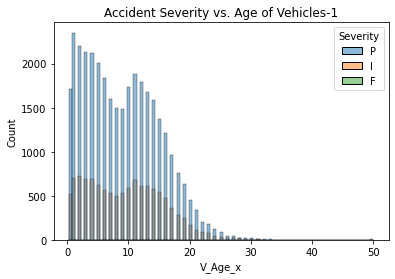

In [39]:
ax=sns.histplot(data=df6, x='V_Age_x', hue='Severity')
ax.set_title('Accident Severity vs. Age of Vehicles-1')

Text(0.5, 1.0, 'Accident Severity vs. Age of Vehicles-2')

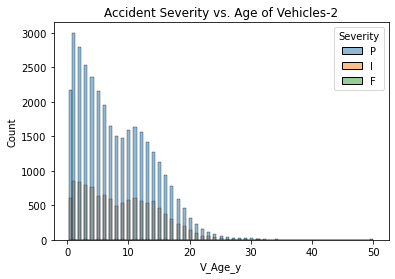

In [40]:
ax=sns.histplot(data=df6, x='V_Age_y', hue='Severity')
ax.set_title('Accident Severity vs. Age of Vehicles-2')

In [41]:
df7=df6.drop(columns=['Number', 'Datetime'])

In [42]:
df7.head()

,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Vehicle Use_x,V_Age_x,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y,Vehicle Use_y,V_Age_y,Severity
0,06,06,02,01,01,10.0,06,06,02,01,01,10.0,P
1,03,04,04,04,01,6.0,12,12,04,01,01,12.0,P
2,12,12,02,01,01,1.0,06,03,04,08,01,10.0,I
3,02,02,03,01,01,16.0,07,17,02,31,01,9.0,P
4,12,12,04,01,02,8.0,06,06,02,05,01,17.0,P


In [43]:
df7.isnull().sum()

Initial Impact Location_x      287
Principal Damage Location_x    680
Extent of Damage_x               0
Vehicle Type_x                 321
Vehicle Use_x                  211
V_Age_x                          0
Initial Impact Location_y      287
Principal Damage Location_y    680
Extent of Damage_y               0
Vehicle Type_y                 321
Vehicle Use_y                  211
V_Age_y                          0
Severity                         0
dtype: int64

In [44]:
df7.loc[df7['Extent of Damage_x']=='00', 'Extent of Damage_x']='01'
df7.loc[df7['Extent of Damage_y']=='00', 'Extent of Damage_y']='01'

Text(0.5, 1.0, 'Accident Severity vs. Extent of Damage_x')

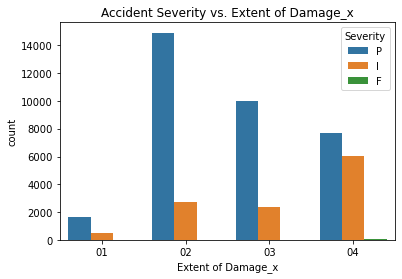

In [45]:
ax = sns.countplot(x="Extent of Damage_x", hue="Severity", order=['01', '02', '03', '04'], data=df7)
ax.set_title('Accident Severity vs. Extent of Damage_x')

In [46]:
df7.Severity[df7['Extent of Damage_x']=='00'].value_counts()

Series([], Name: Severity, dtype: int64)

Text(0.5, 1.0, 'Accident Severity vs. Extent of Damage_y')

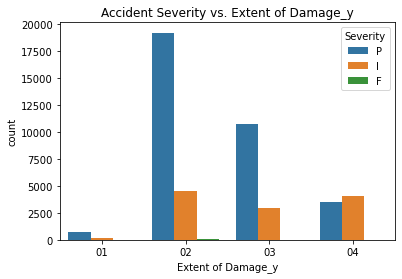

In [47]:
ax = sns.countplot(x="Extent of Damage_y", hue="Severity",order=['01', '02', '03', '04'], data=df7)
ax.set_title('Accident Severity vs. Extent of Damage_y')

In [48]:
df7.Severity[df7['Extent of Damage_x']=='00'].value_counts()

Series([], Name: Severity, dtype: int64)

In [49]:
df7['Vehicle Type_x'].value_counts()

01    29588
04     8329
05     3416
20      759
03      697
25      538
02      392
31      384
21      266
08      252
23      241
30      198
29      197
22      167
10       88
24       46
00       39
99       26
40       21
07       19
19       17
11       11
26       10
13        6
27        3
06        2
12        1
Name: Vehicle Type_x, dtype: int64

In [50]:
df7.shape

(46034, 13)

In [51]:
df7.loc[df7.groupby('Vehicle Type_x')['Vehicle Type_x'].transform('count').lt(100), 'Vehicle Type_x'] = 'Other'

In [52]:
df7['Vehicle Type_x'].value_counts()

01       29588
04        8329
05        3416
20         759
03         697
25         538
02         392
31         384
Other      289
21         266
08         252
23         241
30         198
29         197
22         167
Name: Vehicle Type_x, dtype: int64

In [53]:
df7.loc[df7.groupby('Vehicle Type_y')['Vehicle Type_y'].transform('count').lt(100), 'Vehicle Type_y'] = 'Other'

In [54]:
df7['Initial Impact Location_y'].value_counts()

06    14239
12     8155
11     3457
01     3102
09     2774
03     2502
02     2175
10     2086
07     2074
05     1668
08     1398
04     1056
14      342
99      177
13      169
00      145
15      117
17      111
Name: Initial Impact Location_y, dtype: int64

In [55]:
df7.loc[df7.groupby('Initial Impact Location_x')['Initial Impact Location_x'].transform('count').lt(200), 'Initial Impact Location_x'] = 'Other'

In [56]:
df7.loc[df7.groupby('Initial Impact Location_y')['Initial Impact Location_y'].transform('count').lt(200), 'Initial Impact Location_y'] = 'Other'

In [57]:
df7['Principal Damage Location_x'].value_counts()

12    18979
01     3992
11     3967
06     3386
02     2432
03     2389
09     2017
10     1621
05     1228
07     1162
04      999
17      924
08      902
14      453
15      293
00      271
13      170
99      169
Name: Principal Damage Location_x, dtype: int64

In [58]:
df7.loc[df7.groupby('Principal Damage Location_x')['Principal Damage Location_x'].transform('count').lt(300), 'Principal Damage Location_x'] = 'Other'
df7.loc[df7.groupby('Principal Damage Location_y')['Principal Damage Location_y'].transform('count').lt(300), 'Principal Damage Location_y'] = 'Other'

In [59]:
df7['Principal Damage Location_y'].value_counts()

06       13593
12        8185
11        3167
01        2860
09        2830
03        2541
02        2104
07        2002
10        1975
05        1729
08        1431
04        1086
Other      802
17         592
14         457
Name: Principal Damage Location_y, dtype: int64

In [63]:
df7.columns

Index(['Initial Impact Location_x', 'Principal Damage Location_x',
       'Extent of Damage_x', 'Vehicle Type_x', 'Vehicle Use_x', 'V_Age_x',
       'Initial Impact Location_y', 'Principal Damage Location_y',
       'Extent of Damage_y', 'Vehicle Type_y', 'Vehicle Use_y', 'V_Age_y',
       'Severity'],
      dtype='object')

interval columns not set, guessing: ['V_Age_x', 'V_Age_y']


Text(0.5, 1.0, 'Correlation of the Vehicle Features')

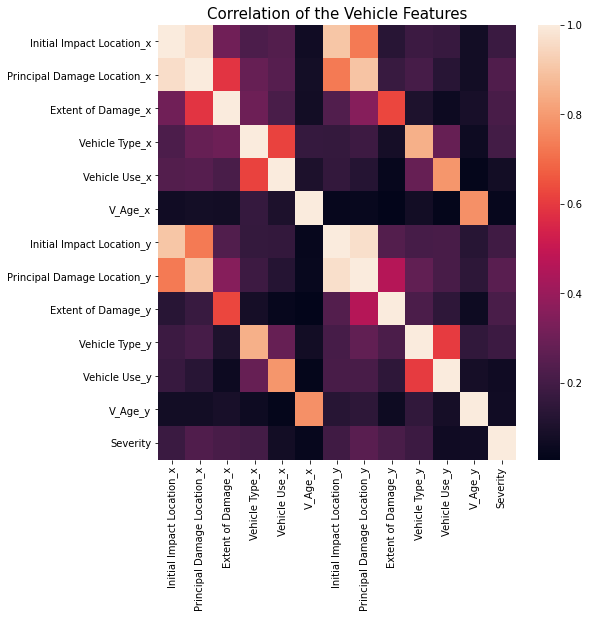

In [67]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(df7.phik_matrix())
ax.set_title('Correlation of the Vehicle Features', fontsize=15)

interval columns not set, guessing: ['V_Age_x', 'V_Age_y']


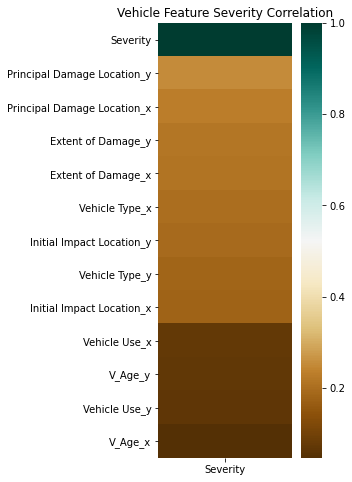

In [65]:
plt.figure(figsize=(3, 8))
heatmap = sns.heatmap(df7.phik_matrix()[['Severity']].sort_values(by='Severity', ascending=False),cmap='BrBG')
heatmap.set_title('Vehicle Feature Severity Correlation');

In [61]:
df7.phik_matrix()

interval columns not set, guessing: ['V_Age_x', 'V_Age_y']


,Initial Impact Location_x,Principal Damage Location_x,Extent of Damage_x,Vehicle Type_x,Vehicle Use_x,V_Age_x,Initial Impact Location_y,Principal Damage Location_y,Extent of Damage_y,Vehicle Type_y,Vehicle Use_y,V_Age_y,Severity
Initial Impact Location_x,1.000000,0.965706,0.308954,0.222669,0.239403,0.071653,0.905098,0.728817,0.134469,0.182189,0.170648,0.075826,0.178878
Principal Damage Location_x,0.965706,1.000000,0.586880,0.283576,0.247959,0.078739,0.727798,0.901191,0.173110,0.207481,0.131468,0.077144,0.232332
Extent of Damage_x,0.308954,0.586880,1.000000,0.298800,0.216423,0.075241,0.234651,0.355156,0.627378,0.108303,0.061673,0.090178,0.213226
Vehicle Type_x,0.222669,0.283576,0.298800,1.000000,0.617767,0.165585,0.162552,0.186378,0.082432,0.848712,0.283565,0.066253,0.201872
Vehicle Use_x,0.239403,0.247959,0.216423,0.617767,1.000000,0.104230,0.157992,0.125726,0.046230,0.285000,0.790180,0.037185,0.076056
V_Age_x,0.071653,0.078739,0.075241,0.165585,0.104230,1.000000,0.045144,0.049624,0.028700,0.076506,0.039603,0.779219,0.047119
Initial Impact Location_y,0.905098,0.727798,0.234651,0.162552,0.157992,0.045144,1.000000,0.968561,0.238925,0.208726,0.212214,0.130287,0.193157
Principal Damage Location_y,0.728817,0.901191,0.355156,0.186378,0.125726,0.049624,0.968561,1.000000,0.462981,0.272970,0.211087,0.145868,0.253649
Extent of Damage_y,0.134469,0.173110,0.627378,0.082432,0.046230,0.028700,0.238925,0.462981,1.000000,0.219794,0.147334,0.064185,0.216950
Vehicle Type_y,0.182189,0.207481,0.108303,0.848712,0.285000,0.076506,0.208726,0.272970,0.219794,1.000000,0.601754,0.155453,0.184113


In [62]:
Camden_V3.to_csv('Camden_accidents/Camden_V3.csv')